In [8]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
from sklearn.preprocessing import StandardScaler

#### read in train/test sets

In [9]:
df_train_sets = pd.read_pickle('ebw_poc_train_sample_expt3_with_shf_aligned_h1.pkl')
df_test_sets  = pd.read_pickle('ebw_poc_test_sample_expt3_with_shf_aligned_h1.pkl')

#### read in GBM model

In [10]:
file_gbm='best_est_gbm_h1_expt3_with_aligned_shf_nocorr.pkl'
with open(file_gbm, 'rb') as file:
    best_estimators_gbm = pickle.load(file)

#### prereqs for SHAP value computation

In [35]:
import shap
from shap import Explainer

In [36]:
explainers = {}
shaps = {}
shap_weeks = [1, 4, 8, 13, 26]
shap_weeks = range(27)

for wk in shap_weeks:
    sv = best_estimators_gbm[wk]
    feature_names = sv.estimator.feature_names_in_
    feature_cols = df_train_sets.columns

    X_test = df_test_sets[df_test_sets.index.get_level_values(3) == wk]
    X_test = pd.get_dummies(X_test, columns=['market_name'])
    missing_cols = list(set(sv.estimator.feature_names_in_) - set(X_test.columns))
    print(missing_cols)
    for col in missing_cols:
        X_test[col] = 0
    test_idx = X_test[sv.estimator.feature_names_in_].dropna().index
    X_test = X_test.loc[test_idx]

    explainers[wk] = Explainer(sv.predict, masker=X_test[feature_names], feature_names=feature_names, max_evals=2500)
    shaps[wk] = explainers[wk](X_test[feature_names])

[]


Permutation explainer: 343it [09:31,  1.69s/it]                         


[]


Permutation explainer: 343it [08:13,  1.47s/it]                         


[]


Permutation explainer: 338it [06:04,  1.12s/it]                         


[]


Permutation explainer: 338it [11:31,  2.08s/it]                         


[]


Permutation explainer: 329it [11:54,  2.20s/it]                         


[]


Permutation explainer: 326it [10:23,  1.95s/it]                         


[]


Permutation explainer: 311it [05:03,  1.01s/it]                         


[]


Permutation explainer: 306it [05:08,  1.04s/it]                         


[]


Permutation explainer: 297it [04:44,  1.01it/s]                         


[]


Permutation explainer: 292it [08:44,  1.84s/it]                         


[]


Permutation explainer: 277it [11:07,  2.45s/it]                         


[]


Permutation explainer: 268it [05:32,  1.28s/it]                         


[]


Permutation explainer: 255it [05:56,  1.44s/it]                         


[]


Permutation explainer: 244it [05:39,  1.44s/it]                         


[]


Permutation explainer: 237it [04:49,  1.27s/it]                         


[]


Permutation explainer: 226it [07:52,  2.14s/it]                         


[]


Permutation explainer: 216it [04:05,  1.19s/it]                         


[]


Permutation explainer: 210it [05:37,  1.66s/it]                         


[]


Permutation explainer: 200it [04:30,  1.41s/it]                         


[]


Permutation explainer: 190it [06:18,  2.05s/it]                         


[]


Permutation explainer: 179it [02:33,  1.09it/s]                         


[]


Permutation explainer: 177it [02:53,  1.05s/it]                         


[]


Permutation explainer: 169it [04:42,  1.73s/it]                         


['market_name_Minneapolis']


Permutation explainer: 162it [02:25,  1.03it/s]                         


['market_name_Minneapolis']


Permutation explainer: 155it [01:48,  1.29it/s]                         


['market_name_Minneapolis']


Permutation explainer: 151it [02:06,  1.10it/s]                         


['market_name_Minneapolis']


Permutation explainer: 146it [02:48,  1.24s/it]                         


In [21]:
explainers[1]

<shap.explainers._permutation.Permutation.__init__.<locals>.Permutation at 0x7f9fd4f28340>

In [39]:
len(shaps)

27

In [1]:
import pickle
shap_file_name = 'ebw_shaps_expt3_with_shf_aligned_nocorr_h1.pkl'
explainer_file_name = 'ebw_explainers_expt3_with_shf_aligned_h1.pkl'

In [38]:
with open(shap_file_name, 'wb') as file:
    pickle.dump(shaps, file)

# with open(explainer_file_name, 'wb') as file:
#     pickle.dump(explainers, file)

In [2]:
with open(shap_file_name, 'rb') as file:
    shaps = pickle.load(file)

In [6]:
shaps[0].shape

(342, 176)

In [14]:
shap_df  = {}

In [25]:
# Add index and column names to shap arrays
for wk in range(27):
    sv = best_estimators_gbm[wk]
    feature_names = sv.estimator.feature_names_in_
    feature_cols = df_train_sets.columns

    X_test = df_test_sets[df_test_sets.index.get_level_values(3) == wk]
    X_test = pd.get_dummies(X_test, columns=['market_name'])
    missing_cols = list(set(sv.estimator.feature_names_in_) - set(X_test.columns))
    print(missing_cols)
    for col in missing_cols:
        X_test[col] = 0
    test_idx = X_test[sv.estimator.feature_names_in_].dropna().index
    X_test = X_test.loc[test_idx]
    print(type(shaps[wk].values))
    print(shaps[wk].shape)
    shap_df[wk] = pd.DataFrame(shaps[wk].values, index=X_test.index, columns=feature_names)

[]
<class 'numpy.ndarray'>
(342, 176)
[]
<class 'numpy.ndarray'>
(342, 226)
[]
<class 'numpy.ndarray'>
(337, 192)
[]
<class 'numpy.ndarray'>
(337, 221)
[]
<class 'numpy.ndarray'>
(328, 218)
[]
<class 'numpy.ndarray'>
(325, 235)
[]
<class 'numpy.ndarray'>
(310, 228)
[]
<class 'numpy.ndarray'>
(305, 246)
[]
<class 'numpy.ndarray'>
(296, 229)
[]
<class 'numpy.ndarray'>
(291, 239)
[]
<class 'numpy.ndarray'>
(276, 246)
[]
<class 'numpy.ndarray'>
(267, 247)
[]
<class 'numpy.ndarray'>
(254, 253)
[]
<class 'numpy.ndarray'>
(243, 248)
[]
<class 'numpy.ndarray'>
(236, 254)
[]
<class 'numpy.ndarray'>
(225, 256)
[]
<class 'numpy.ndarray'>
(215, 255)
[]
<class 'numpy.ndarray'>
(209, 241)
[]
<class 'numpy.ndarray'>
(199, 245)
[]
<class 'numpy.ndarray'>
(189, 229)
[]
<class 'numpy.ndarray'>
(178, 229)
[]
<class 'numpy.ndarray'>
(176, 222)
[]
<class 'numpy.ndarray'>
(168, 219)
['market_name_Minneapolis']
<class 'numpy.ndarray'>
(161, 223)
['market_name_Minneapolis']
<class 'numpy.ndarray'>
(154, 210)


In [33]:
shap_df_all = pd.DataFrame()
for wk in range(27):
    df_temp = shap_df[wk].reset_index().melt(id_vars=['mediabase_id', 'call_letters', 'weeks_since_hit', 'week_dt'])
    shap_df_all = pd.concat([shap_df_all, df_temp])

In [40]:
shap_df_all['abs_value'] = np.abs(shap_df_all['value'])

In [47]:
shap_df_all['variable_rank'] = shap_df_all.groupby(['mediabase_id', 'call_letters', 'weeks_since_hit'])['abs_value'].rank(ascending=False)

In [48]:
shap_df_all.to_pickle('ebw_shaps_expt3_with_shf_aligned_nocorr_unpivot_df_h1.pkl')

In [37]:
from sqlalchemy import create_engine


def postgresql_engine(user, pwd, host, port, dbname):
    # Need psycopg2-binary package
    sql_engine = create_engine('postgres://' + user + ':' + pwd + '@' + host + ':' + port + '/' + dbname, echo=False)
    return sql_engine


# DB username & password
import getpass

username = getpass.getpass()
password = getpass.getpass()

# misc db parameters
url = 'adds-postgres-dev.cfgztrijqgvp.us-east-1.rds.amazonaws.com'
database = 'musiclab'
port = '5432'

#create db engine
engine = postgresql_engine(username, password, url, port, database)

In [49]:
with engine.connect() as conn:
    with conn.begin():
        shap_df_all.to_sql(name='ebw_shap_test_h1', con=conn, schema='adds_temp', if_exists='replace', index=False, method='multi', chunksize=100000)

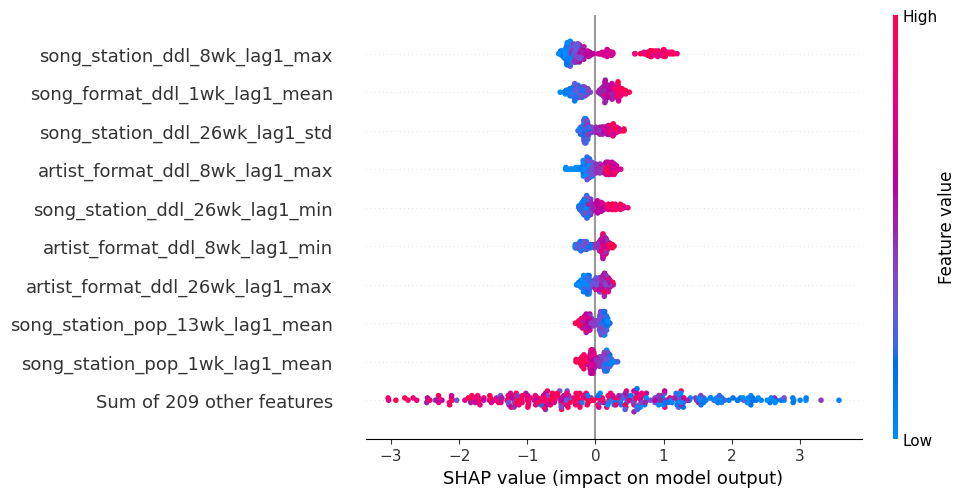

In [56]:
from shap.plots import beeswarm
beeswarm(shaps[4], max_display=10)

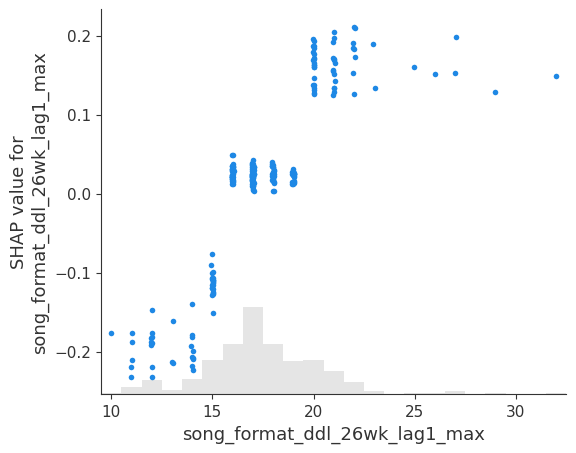

In [31]:
shap.plots.scatter(shaps[13][:, "song_format_ddl_26wk_lag1_max"])

In [ ]:
shap.dependence_plot()